In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import LogisticTS
from porise.envs.real import ChainOfferEnv
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
env = ChainOfferEnv(rat_log_path='../porise/data/sampled_rat_log_exp5217.csv', user_vectors_map=user_map)

### Test LogTS2

In [4]:
model = LogisticTS(n_arms=env.n_arms,
                  lambda_=1, # exploitation
                  alpha=10, # exploration, very important for performance
                  arm_feat_dim=env.arm_feat_dim,
                  user_feat_dim=env.user_feat_dim,
                  return_list=False)

simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))

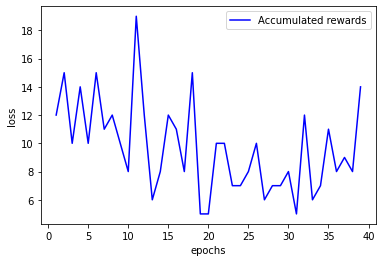

400000it [25:58, 256.67it/s, total reward=384]                            


In [5]:
simulator.run()